In [1]:
#Ldft classes
from generator import *
from ldft_classes_v2.lg_2d_highl import LG2dAOHighl as Highl2d
from ldft_classes_v2.lg_3d_highl import LG3dAOHighl as Highl3d
from ldft_classes_v2.lg_2d_mf import LG2dMf as Mf2d
from ldft_classes_v2.lg_3d_mf import LG3dMf as Mf3d

#Ploting tools
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Test the generator script
This notebook tests all the functions definded in the script **generator.py**. This will not guarantee their functionallity in all aspects but makes it very likely that tey work fine.

Altough this notebook was created only for testing purposes, it may also be regarded a little tutorial through the **generator.py** module.

**Hint:** You can always display the help from any function tested here. This will explain you what the function does and which arguments are required. See for example below the help of the `create_sys` function.

In [5]:
help(create_sys)

Help on function create_sys in module generator:

create_sys(Model, size, epsi, dens, init, bd_cond='periodic')
    Creates a instance of the LdftModel `Model` under the parameters `size`,
    `epsi`, `dens`. The `init`-parameter determines the initial density profile
    of the created system.
    
    Parameters
    ----------
    Model : `class`
        The model, the system should be an instance of. Either ``LGAO2dHighl``,
        ``LGAO3dHighl``, ``LGAO2dMf`` or ``LGAO3dMf``.
    size : `Tuple` of `int`
        Size of the system (for each dimension).
    epsi : `float`
        Attraction strength (times inverse temperature).
    dens : `float`
        Average density
    init : `string` or `Model`
        Specifies the initial density profile. It is either a system providing
        its current density profile or a String. The following strings are
        supported: 'hom', 'sph', 'sl', 'cyl'. Note, that 'sl' and 'cyl' is the
        same in two dimensions. The density profile th

# Test the function `create_sys`
## Create a profile with standart initiation
### two dimensions

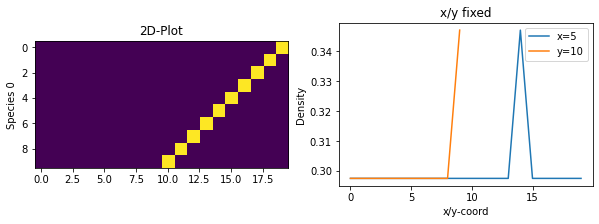

In [2]:
sys = create_sys(Mf2d, (10, 20), 2, 0.3, 'sl', bd_cond='11_if')
fig=sys.print_2d_profile2()

### three dimensions

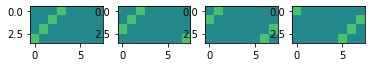

In [3]:
sys = create_sys(Mf3d, (4, 4, 8), 2, 0.3, 'sl', bd_cond='111_if')
fig, ax = plt.subplots(1, 4)
ax[0].imshow(sys.r[:,0,:], vmin=0.2, vmax=0.4)
ax[1].imshow(sys.r[:,1,:], vmin=0.2, vmax=0.4)
ax[2].imshow(sys.r[:,2,:], vmin=0.2, vmax=0.4)
ax[3].imshow(sys.r[:,3,:], vmin=0.2, vmax=0.4)


## Create a profile where the init-profile is taken over from another confic

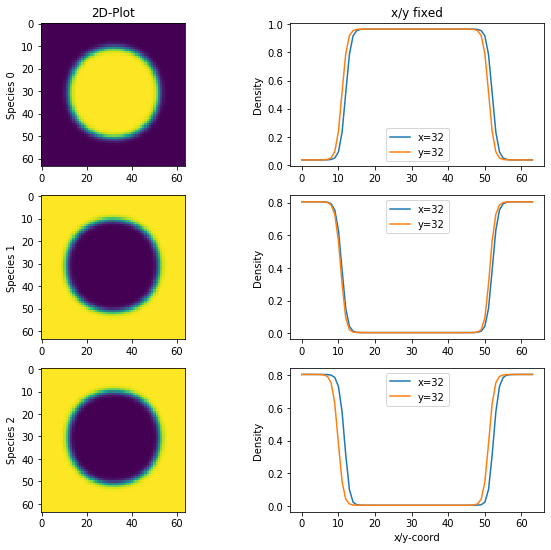

In [5]:
#path to a system
path = "/home/manuel/Documents/Masterarbeit/created_data_(v2)/2d-highl/size=64/epsi=2,0"
#load system
initSys = Highl2d.load_syst(os.path.abspath(path), 'dens=0,33.pkl')
#create new system
sys = create_sys(Highl2d, (64, 64), 2, 0.3, initSys)
#show it
fig=sys.print_2d_profile2()

# Test the function `iterate_and_save`

In [9]:
syst = create_sys(Highl2d, (64, 64), 2, 0.365, 'sl')
iterate_and_save(syst, 0.02, 50000, 'dec2', 'test')

checkpoint at:         20, Error: 0.007530714705212273
checkpoint at:         40, Error: 0.001620637020926405
checkpoint at:         60, Error: 0.0007462605720970183
checkpoint at:         80, Error: 0.0003996625404211387
checkpoint at:        100, Error: 0.00024985409224152603
checkpoint at:        300, Error: 0.00018694529772715933
checkpoint at:        500, Error: 0.000533121324018345
checkpoint at:        700, Error: 0.0016223498002016679
checkpoint at:        900, Error: 0.0050624559207138355
checkpoint at:       1100, Error: 0.016138244625484376
checkpoint at:       3100, Error:   0.0836952254687579
checkpoint at:       5100, Error: 4.4076917928911657e-07
checkpoint at:       7100, Error: 2.055933406447414e-12
checkpoint at:       9100, Error: 9.502071387521441e-18


# Test the function `generate_series`

In [3]:
generate_series(Highl2d, (20, 20), 2, [0.32, 0.4], 0.02, syst, 0.02, 5000, 'dec2', 'testSer')

checkpoint at:         20, Error:   0.3271512595525186
checkpoint at:         40, Error:   0.1799103099597076
checkpoint at:         60, Error:  0.09740662664904473
checkpoint at:         80, Error:  0.05405783177259751
checkpoint at:        100, Error: 0.031098630488739384
checkpoint at:        300, Error: 0.0015257369630691708
checkpoint at:        500, Error: 0.0004938813125980059
checkpoint at:        700, Error: 0.000167079476450634
checkpoint at:        900, Error: 5.5002174057169705e-05
checkpoint at:       1100, Error: 1.7768946304661228e-05
checkpoint at:       3100, Error: 1.7593186571171728e-10
checkpoint at:         20, Error:   0.3731161114773859
checkpoint at:         40, Error:  0.19819409122473364
checkpoint at:         60, Error:   0.1010418549047638
checkpoint at:         80, Error:  0.05155240293973308
checkpoint at:        100, Error: 0.026577531155198914
checkpoint at:        300, Error: 0.00011670781351115424
checkpoint at:        500, Error: 7.900261288733968e-06

show the results:

dens=0,4(testSer).pkl
dens=0,34(testSer).pkl
dens=0,36(testSer).pkl
dens=0,38(testSer).pkl
dens=0,32(testSer).pkl


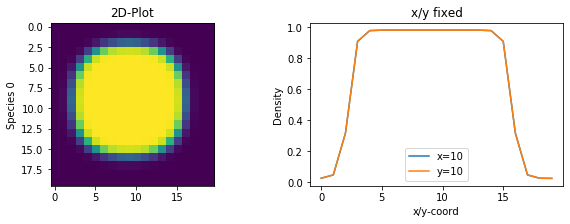

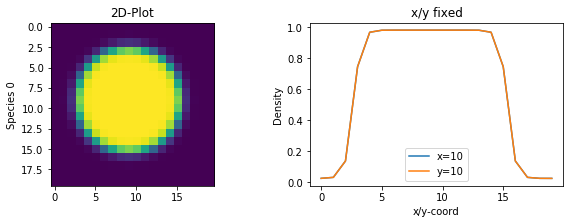

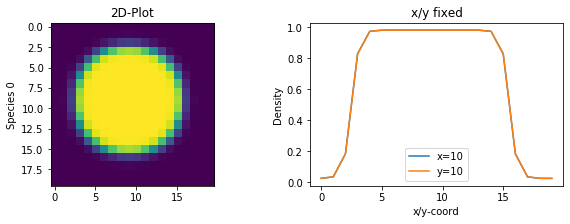

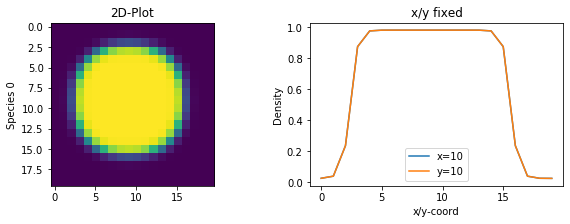

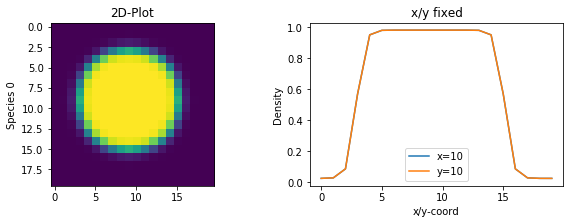

In [8]:
#path to a system
path = "/home/manuel/Documents/Masterarbeit/generatorOutput/2d-mf/size=20/epsi=2"
objects=np.array(os.listdir(path))
for ob in objects:
    print(ob)
    syst = Mf2d.load_syst(os.path.abspath(path), ob)
    fig=syst.print_2d_profile2()

# Test the function `search_trans`

In [6]:
search_trans(Mf2d, (20, 20), 2, [0.1, 0.3], 0.02, 10000, 'dec2', 0.01, 'hom', 'sph')

<class 'ldft_classes_v2.lg_2d_mf.LG2dMf'>
current density: 0.2
checkpoint at:         20, Error: 0.0013322331956164876
checkpoint at:         40, Error: 0.00037977455307968897
checkpoint at:         60, Error: 0.0001428681008404007
checkpoint at:         80, Error: 7.155848803808996e-05
checkpoint at:        100, Error:  4.8155655746894e-05
checkpoint at:        300, Error: 0.00025571854640741535
checkpoint at:        500, Error: 0.005403820485055935
checkpoint at:        700, Error:    12.53531893912714
checkpoint at:        900, Error:   0.2003053829605962
checkpoint at:       1100, Error: 0.001572457856905192
checkpoint at:       3100, Error: 1.901796858043692e-16
leftF=-264.16096941527525
rightF=-305.0955345718056
rightF<leftF
<class 'ldft_classes_v2.lg_2d_mf.LG2dMf'>
current density: 0.15000000000000002
checkpoint at:         20, Error:    2.211393898233207
checkpoint at:         40, Error:   1.1843421618607608
checkpoint at:         60, Error:   0.6317675251438373
checkpoint at: 